In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
## Import and store the data in a data frame

colName=['City1', 'City2', 'Average Fare', 'Distance', 'Average Weekly Passengers', 'Market Leading Airline', 'Market Share', 'Average Fare', 'Low Price Airline', 'Market Share', 'Price']
df = pd.read_table('airq402.dat', names = colName, sep='\s+', engine='python')
df.head()

,City1,City2,Average Fare,Distance,Average Weekly Passengers,Market Leading Airline,Market Share,Average Fare.1,Low Price Airline,Market Share.1,Price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [3]:
## Remove the outliers from the data 

df['Average Fare'] = pd.to_numeric(df['Average Fare'])
df['Average Fare'] = pd.to_numeric(df['Average Fare'])
df['Distance'] = pd.to_numeric(df['Distance'])
df['Average Weekly Passengers'] = pd.to_numeric(df['Average Weekly Passengers'])
df['Market Share'] = pd.to_numeric(df['Market Share'])
df['Market Share'] = pd.to_numeric(df['Market Share'])
df['Price'] = pd.to_numeric(df['Price'])

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print (IQR)

df_withoutoutlier = df[~((df.iloc[:,[2,3,4,6,7,9,10]] < (Q1 - 1.5 * IQR)) | (df.iloc[:,[2,3,4,6,7,9,10]] > (Q3 + 1.5 * IQR))).any(axis=1)]
print('Dataset shape before removal of outlier: ',df.shape)
print('Dataset shape After removal of outlier: ',df_withoutoutlier.shape)

Average Fare                  71.4175
Distance                     899.0000
Average Weekly Passengers    512.7150
Market Share                  27.0000
Average Fare.1                78.8925
Market Share.1                39.7775
Price                         54.7625
dtype: float64
Dataset shape before removal of outlier:  (1000, 11)
Dataset shape After removal of outlier:  (885, 11)


In [4]:
## Treat “Average Fare” – 3rdColumn as your Dependent Variable and Rest of the columns as Independent Variable and 
##    split the table

df1 = df_withoutoutlier.pop('Average Fare') 
df_withoutoutlier['Average Fare'] = df1       
independent_var = df_withoutoutlier.iloc[:,:-1]
dependent_var = pd.DataFrame(df_withoutoutlier.iloc[:,len(df_withoutoutlier.columns)-1])

print(dependent_var.head(), '\n\n\n', independent_var.head())

   Average Fare
0        114.47
1        122.47
2        214.42
3         69.40
4        158.13 


   City1 City2  Distance  Average Weekly Passengers Market Leading Airline  \
0   CAK   ATL       528                     424.56                     FL   
1   CAK   MCO       860                     276.84                     FL   
2   ALB   ATL       852                     215.76                     DL   
3   ALB   BWI       288                     606.84                     WN   
4   ALB   ORD       723                     313.04                     UA   

   Market Share  Average Fare.1 Low Price Airline  Market Share.1   Price  
0         70.19          111.03                FL           70.19  111.03  
1         75.10          123.09                DL           17.23  118.94  
2         78.89          223.98                CO            2.77  167.12  
3         96.97           68.86                WN           96.97   68.86  
4         39.79          161.36                WN        

In [5]:
## Drop the independent variables which has less than 0.1 correlation with the dependent variable

corr_mat = df_withoutoutlier.corr(method='pearson')
print(corr_mat)
values_less = corr_mat[corr_mat['Average Fare'] < 0.1]
values = values_less.index.values
independent_var.drop(values,axis=1,inplace=True)
independent_var.head()

                           Distance  Average Weekly Passengers  Market Share  \
Distance                   1.000000                  -0.129632     -0.547952   
Average Weekly Passengers -0.129632                   1.000000      0.021769   
Market Share              -0.547952                   0.021769      1.000000   
Average Fare.1             0.489721                  -0.163736     -0.193382   
Market Share.1            -0.361519                   0.076176      0.281182   
Price                      0.539894                  -0.209018     -0.314555   
Average Fare               0.522650                  -0.197005     -0.207955   

                           Average Fare.1  Market Share.1     Price  \
Distance                         0.489721       -0.361519  0.539894   
Average Weekly Passengers       -0.163736        0.076176 -0.209018   
Market Share                    -0.193382        0.281182 -0.314555   
Average Fare.1                   1.000000       -0.519442  0.794157   
Mark

,City1,City2,Distance,Market Leading Airline,Average Fare.1,Low Price Airline,Price
0,CAK,ATL,528,FL,111.03,FL,111.03
1,CAK,MCO,860,FL,123.09,DL,118.94
2,ALB,ATL,852,DL,223.98,CO,167.12
3,ALB,BWI,288,WN,68.86,WN,68.86
4,ALB,ORD,723,UA,161.36,WN,145.42


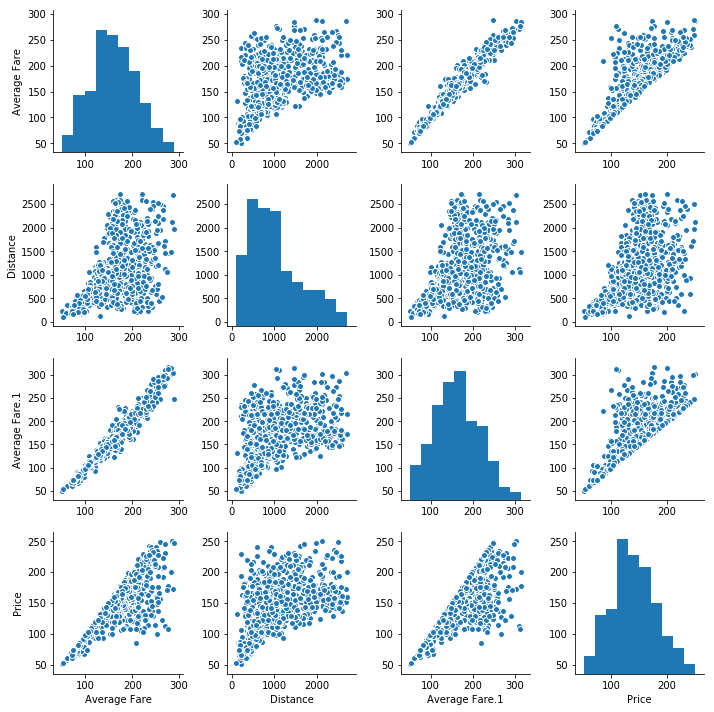

In [6]:
## Create scatter Plot of Independent Variable vs Dependent Variable. 

scatter_mattrix = pd.concat([dependent_var,independent_var],axis=1)
sns.pairplot(scatter_mattrix)

In [7]:
## Divide the data set into training and test data set and build a Multiple Linear Regression model.

from sklearn.model_selection import train_test_split
from sklearn import linear_model
X_train, X_test, y_train, y_test = train_test_split(independent_var.iloc[:,[2,4,6]], dependent_var, test_size=0.2,random_state=10)
print ('X_train {}, \n y_train {}'.format(X_train.head(),y_train.head()))
print ('--------------------------------------------------------------------------------------------------')
print ('X_test {},\n y_test {}'.format(X_test.head(),y_test.head()))

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

X_train      Distance  Average Fare.1   Price
633       543           91.02   91.02
553       626          231.17  134.71
208      2537          254.66  227.83
210      1046          200.30  132.82
206      2300          229.39  147.39, 
 y_train      Average Fare
633         97.89
553        168.80
208        243.79
210        193.78
206        184.68
--------------------------------------------------------------------------------------------------
X_test      Distance  Average Fare.1   Price
202      1367          157.54  137.18
491       453          214.53  203.09
314      1733          203.36  127.08
461       391          138.05  138.05
407      1468          278.83  230.30,
 y_test      Average Fare
202        157.76
491        210.02
314        179.94
461        163.12
407        269.76


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [8]:
## Print the coefficients & intercepts of the linear regression model

print('Intercept: ', regr.intercept_)
print('Coefficients: ', regr.coef_)

#Predict the values
print ('Average Fare Predicted: ',regr.predict([[181,81.91, 81.91]])) #first value
print ('Actual Average Fare:', y_test.values[4])#corresponding First value

Intercept:  [6.14769617]
Coefficients:  [[0.00217066 0.73738054 0.22609755]]
Average Fare Predicted:  [[85.45907599]]
Actual Average Fare: [269.76]
